# Level 3

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Railway_info level 3.csv')
df.head()

,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days,weekend
0,107,SWVMAOVLNK,SAWANTWADI ROAD,MADGOAN JN,Saturday,Weekend
1,108,VLNKMAOSWV,MADGOAN JN,SAWANTWADI ROAD,Friday,Friday
2,128,MAOKOP SPEC,MADGOAN JN,CHHATRAPATI SHAHU MAHARAJ TERMINUS,Friday,Friday
3,290,PALACE ON WH,DELHISAFDAR JANG,DELHISAFDAR JANG,Wednesday,Wednesday
4,401,BSB BHARATDA,AURANGABAD,VARANASI JN,Saturday,Weekend


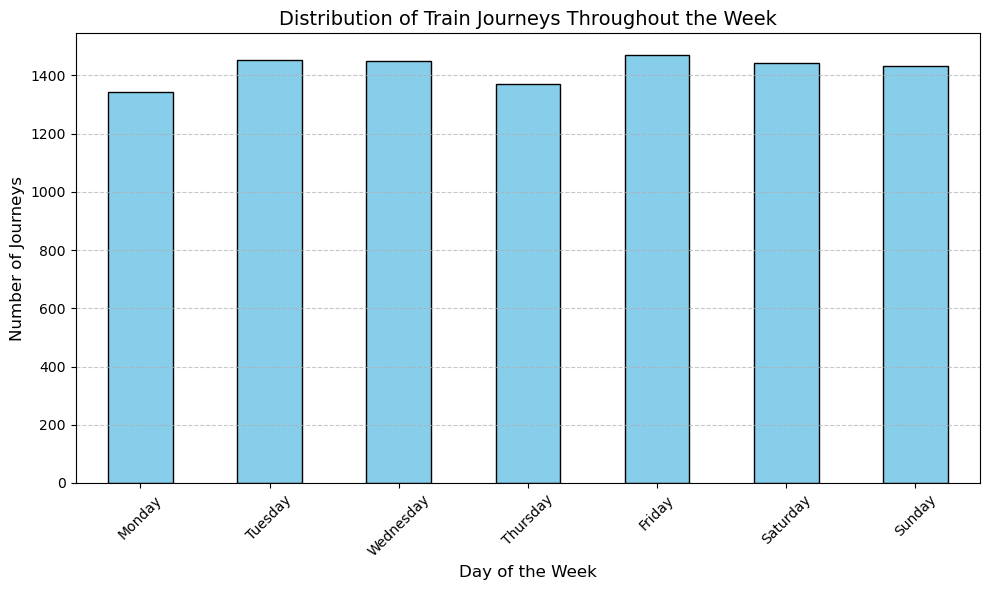

In [4]:
journey_distribution = df['days'].value_counts()

# Sort the index to ensure days are in the correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
journey_distribution = journey_distribution.reindex(day_order, fill_value=0)

# Plot the distribution using a bar plot
plt.figure(figsize=(10, 6))
journey_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Distribution of Train Journeys Throughout the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Journeys', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### calcule frequency

In [17]:
frequency_df_days = df.groupby(['days']).size().reset_index(name='Frequency')

# Sort by frequency
frequency_df_days = frequency_df_days.sort_values(by='Frequency', ascending=False)

frequency_df_days

,days,Frequency
0,Friday,1471
5,Tuesday,1454
6,Wednesday,1448
2,Saturday,1441
3,Sunday,1432
4,Thursday,1372
1,Monday,1342


C:\Users\RPC\AppData\Local\Temp\ipykernel_17712\418070512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_trends, x='days', y='Frequency', palette='viridis')


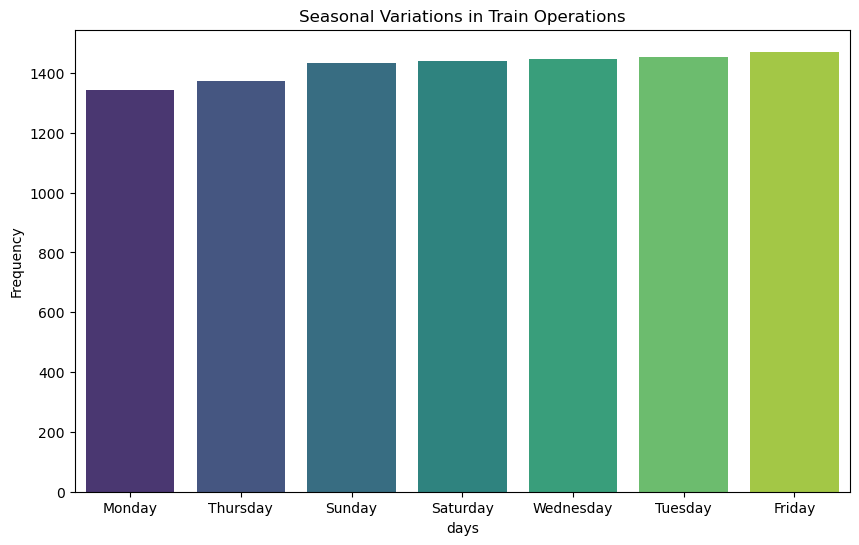

In [62]:
# Aggregate by month
seasonal_trends = frequency_df_days.groupby('Frequency')['days'].sum().reset_index()

# Plot seasonal trends
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_trends, x='days', y='Frequency', palette='viridis')
plt.title('week Variations in Train Operations')
plt.xlabel('days')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Calculate frequency
frequency_df = df.groupby(['Source_Station_Name', 'Destination_Station_Name']).size().reset_index(name='Frequency')

# Sort by frequency
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

frequency_df

,Source_Station_Name,Destination_Station_Name,Frequency
4091,TAMBARAM,CHENNAI BEACH,137
850,CHENNAI BEACH,TAMBARAM,137
1030,CSTMUMBAI,PANVEL,94
3247,PANVEL,CSTMUMBAI,93
3615,RAVLI JN,CSTMUMBAI,90
...,...,...,...
1775,HOWRAH JN,JAGADALPUR,1
1776,HOWRAH JN,JAISALMER,1
1777,HOWRAH JN,JALESWAR,1
1778,HOWRAH JN,JAMALPUR JN,1


In [56]:
frequency_days = df.groupby(['Train_No']).size().reset_index(name='days')

# Sort by frequency
frequency_days = frequency_days.sort_values(by='days', ascending=False)

frequency_days

,Train_No,days
0,107,1
6642,63240,1
6635,63231,1
6636,63232,1
6637,63233,1
...,...,...
3321,31816,1
3322,31817,1
3323,31818,1
3324,31819,1


In [60]:
import scipy.stats as stats

# Perform ANOVA test to check if the means of Train_No differ across days
anova_result = stats.f_oneway(
    df[df['days'] == 'Monday']['Train_No'],
    df[df['days'] == 'Tuesday']['Train_No'],
    df[df['days'] == 'Wednesday']['Train_No'],
    df[df['days'] == 'Thursday']['Train_No'],
    df[df['days'] == 'Friday']['Train_No'],
    df[df['days'] == 'Saturday']['Train_No'],
    df[df['days'] == 'Sunday']['Train_No']
)

print("ANOVA Test Result:")
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

# Interpret the result
if anova_result.pvalue < 0.05:
    print("There is a significant difference in the frequencies between the days of the week.")
else:
    print("There is no significant difference in the frequencies between the days of the week.")


ANOVA Test Result:
F-statistic: 0.23207142638200376, p-value: 0.9663063631273688
There is no significant difference in the frequencies between the days of the week.


# We notice that train ridership increases significantly on Friday and decreases significantly on Monday